In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [32]:

def sum_fluorescence_per_ind(profile, peak_intervals):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    sum5 = 0
    sum6 = 0

    to_consider1 = list(range(int(peak_intervals[0][0]),int(peak_intervals[0][1])))
    to_consider2 = list(range(int(peak_intervals[1][0]),int(peak_intervals[1][1])))
    to_consider3 = list(range(int(peak_intervals[2][0]),int(peak_intervals[2][1])))
    to_consider4 = list(range(int(peak_intervals[3][0]),int(peak_intervals[3][1])))
    to_consider5 = list(range(int(peak_intervals[4][0]),int(peak_intervals[4][1])))
    to_consider6 = list(range(int(peak_intervals[5][0]),int(peak_intervals[5][1])))

    for i in range(0,len(profile)):
        if i in to_consider1:
            sum1 += profile[i]

    for i in range(0,len(profile)):
        if i in to_consider2:
            sum2 += profile[i]

    for i in range(0,len(profile)):
        if i in to_consider3:
            sum3 += profile[i]

    for i in range(0,len(profile)):
        if i in to_consider4:
            sum4 += profile[i]

    for i in range(0,len(profile)):
        if i in to_consider5:
            sum5 += profile[i]

    for i in range(0,len(profile)):
        if i in to_consider6:
            sum6 += profile[i]

    return [sum1, sum2, sum3, sum4, sum5, sum6]

In [3]:
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [4]:
def find_half_peak_from_top(peak,profile,index_top):
    margin_bottom = 0;
    margin_top = len(profile)

    if (peak == '1'):
        margin_bottom = 2
        margin_top = peaks[str(int(peak)+1)][0]
    if (peak == '2'):
        margin_bottom = peaks[str(int(peak)-1)][1]
        margin_top = peaks[str(+int(peak)+1)][0]
    if (peak == '3'):
        margin_bottom = peaks[str(int(peak)-1)][1]
        margin_top = peaks[str(+int(peak)+1)][0]
    if (peak == '4'):
        margin_bottom = peaks[str(int(peak)-1)][1]
        margin_top = peaks[str(+int(peak)+1)][0]
    if (peak == '5'):
        margin_bottom = peaks[str(int(peak)-1)][1]
        margin_top = peaks[str(+int(peak)+1)][0]
    if (peak == '6'):
        margin_bottom = peaks[str(int(peak)-1)][1]
        #margin_top = peaks[str(+int(peak)+1)][0]
        margin_top = 340

    half_value = profile[index_top]/2

    left_half = profile[:index_top]
    right_half = profile[index_top:]

    closest_right = 0
    distance_right = 9999999999

    #go_right
    for v in range(index_top,len(profile)):
        if profile[v] - half_value < distance_right:
            distance_right = profile[v] - half_value
            closest_right = v
        if (profile[v] < half_value) or (v > margin_top):
            break;

    closest_left = 0
    distance_left = 9999999999

    # go_left
    for v in range(index_top, 0, -1):
        if profile[v] - half_value < distance_left:
            distance_left = profile[v] - half_value
            closest_left = v
        if (profile[v] < half_value) or (v < margin_bottom):
            break;

    return [closest_left,closest_right]

In [5]:
f = open('Samples.csv')

In [6]:
d = {}

In [7]:
lines = f.readlines()

In [8]:
for line in lines:
    line = line.strip()
    # line = line.replace(',','.')
    aux = line.split(',')
    k = aux[0]
    val = aux[1:]
    values = list(map(float,val))
    d[k] = values

In [9]:
peaks = {'1': [48, 57], '2': [112, 129], '3': [136, 166], '4': [178, 201], '5': [241, 251], '6': [263, 278]}

Sample [684.9000000000001, 1631.6999999999998, 1255.1000000000001, 1498.3999999999999, 2737.7, 1803.4999999999995]
D1406 [1236.5557801390305, 298.94474304311893, 12.409818928329429, 2106.2741131568355, 2345.374547780408, 1355.631061826808]
D1202 [449.74678252838464, 212.76701012692178, 70.10629726606338, 1015.243376126725, 1930.7586085297796, 837.5120994283369]
D1411 [992.7538879663404, 304.0813451087758, 41.67548756982426, 1701.7020936154688, 4536.459957255473, 2034.5255315257082]
D1388 [629.9615763618676, 232.58269127285232, 123.55462177924699, 1148.3448824321858, 5345.268273788689, 1887.4227486943116]
D1401 [1090.8913848528337, 237.32779698794042, 72.39375755017579, 1600.2854136840147, 3487.558849656679, 1419.6137349386836]
D1167 [1261.235301030539, 231.05365219733088, 48.792960783423396, 830.4896754900906, 1612.5223521374407, 739.6095510948122]
D1183 [1211.5311558319986, 288.17080106495564, 88.52383430398051, 747.1755163690267, 1370.9116628053944, 1351.6333465581904]
D1143 [786.286

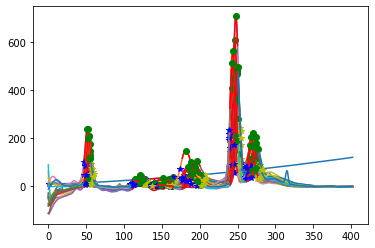

In [51]:
for ind in d.keys():
    
    # print(ind)
    # plt.figure()
    # plt.show()
    # plt.xlabel('Molecular Weight (kDa)')
    # plt.ylabel('Fluorescence')
    plt.plot(d[ind])

    peak_intervals = []

    for peak in peaks.keys():
        # Janela inicial
        [init,fim] = peaks[peak]
        window = d[ind][init-1:fim]
        xs = range(init-1,fim)
        index_max_window = window.index(max(window))
        plt.plot(xs , window, 'r')

        # Maximums
        index_max = init-1 + index_max_window
        plt.plot(index_max, window[index_max_window],'go')

        boundaries = find_half_peak_from_top(peak,d[ind],index_max)

        plt.plot(boundaries[0], d[ind][boundaries[0]],'b*')
        plt.plot(boundaries[1], d[ind][boundaries[1]],'y*')

        peak_intervals.append(boundaries)

    #print(peak_intervals)
    print(ind,str(sum_fluorescence_per_ind(d[ind],peak_intervals)))
    data = (ind,(sum_fluorescence_per_ind(d[ind],peak_intervals)))


    # plt.show()
    #plt.savefig ("area"+ind+".png")

In [38]:
print(data)

('D1261', [770.51308585929, 443.0920552331041, 11.64150245995808, 253.81810986129253, 3316.8534094682723, 2253.860076453978])


In [47]:
data1 = pd.DataFrame(data)
data1.head()

,0
0,D1261
1,"[770.51308585929, 443.0920552331041, 11.641502..."


In [35]:
df = df.append(sum_fluorescence_per_ind(d[ind],peak_intervals))
# df.columns=['Areas']
print(df)

0
0   770.513086
1   443.092055
2    11.641502
3   253.818110
4  3316.853409
5  2253.860076
0   770.513086
1   443.092055
2    11.641502
3   253.818110
4  3316.853409
5  2253.860076
0   770.513086
1   443.092055
2    11.641502
3   253.818110
4  3316.853409
5  2253.860076
0   770.513086
1   443.092055
2    11.641502
3   253.818110
4  3316.853409
5  2253.860076


In [15]:
df = pd.DataFrame(sum_fluorescence_per_ind(d[ind],peak_intervals))
df.head()

,0
0,770.513086
1,443.092055
2,11.641502
3,253.818110
4,3316.853409


In [29]:
print(result)

NameError: name 'result' is not defined